# Code Used for Plan 5 Internal Validity.

### Also has code to make TempeCensus.csv, emsWastewaterSites.csv, emsCallsNotCollectionSiteCensus.csv


code by Maddie Warndorf

Census information was pulled from:
https://services.arcgis.com/lQySeXwbBg53XWDi/ArcGIS/rest/services/Map/FeatureServer/0

Variables were deciphered using:
https://api.census.gov/data/2018/pdb/tract/variables.html

## Tempe Census Tracts Information

making of TempeCensus.csv

In [2]:
#Packages Used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import pickle as pkl
from descartes import PolygonPatch

import requests
import pandas as pd
import feedparser
from bs4 import BeautifulSoup
import urllib.request
import urllib3
import json
from pandas.io.json import json_normalize

In [4]:
#Pulling Tempe census data from feature layer
tempe = gpd.read_file("https://services.arcgis.com/lQySeXwbBg53XWDi/arcgis/rest/services/Map/FeatureServer/0/query?where=OBJECTID+%3E+0+&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&returnCentroid=false&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=4326&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pgeojson&token=")
tempe['geometry']

0     POLYGON ((-111.96132 33.43719, -111.96132 33.4...
1     POLYGON ((-111.92629 33.41915, -111.92611 33.4...
2     POLYGON ((-111.96090 33.42195, -111.95857 33.4...
3     POLYGON ((-111.94358 33.41505, -111.94357 33.4...
4     POLYGON ((-111.90912 33.39411, -111.90912 33.3...
5     POLYGON ((-111.97843 33.39278, -111.97831 33.3...
6     POLYGON ((-111.89248 33.38095, -111.89232 33.3...
7     POLYGON ((-111.92632 33.39467, -111.92632 33.3...
8     POLYGON ((-111.97850 33.43652, -111.97804 33.4...
9     POLYGON ((-111.94352 33.39614, -111.94350 33.4...
10    POLYGON ((-111.92631 33.42204, -111.92507 33.4...
11    POLYGON ((-111.92628 33.41367, -111.92629 33.4...
12    POLYGON ((-111.90907 33.41616, -111.90907 33.4...
13    POLYGON ((-111.90909 33.41105, -111.90909 33.4...
14    POLYGON ((-111.96092 33.38728, -111.96092 33.3...
15    POLYGON ((-111.96157 33.38068, -111.96137 33.3...
16    POLYGON ((-111.96131 33.43790, -111.96131 33.4...
17    POLYGON ((-111.97273 33.32736, -111.97273 

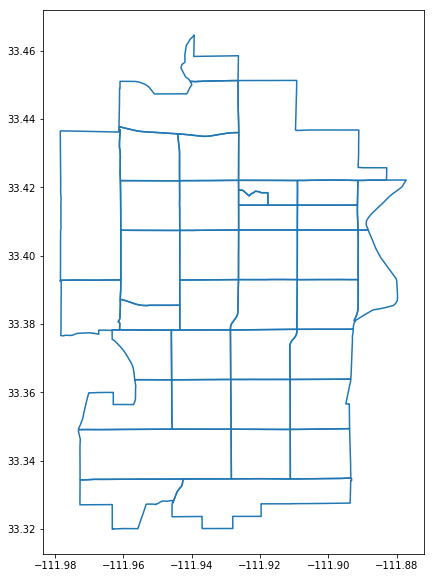

In [205]:
fig, ax = plt.subplots(figsize=(10,10))
tempe.boundary.plot(ax=ax)

Desired columns are as follows:
    TempeTracts_NAME: census tract number
    columns dealing with Age:
        - pdb2018trv4_us_csv_pct_Pop_un_
        - pdb2018trv4_us_csv_pct_Pop_5_18
        - pdb2018trv4_us_csv_pct_Pop_18_3
        - pdb2018trv4_us_csv_pct_Pop_25_5
        - pdb2018trv4_us_csv_pct_Pop_45_7
        - pdb2018trv4_us_csv_pct_Pop_65_1
    columns dealing with Employment:
        - pdb2018trv4_us_csv_pct_Civ_emp_
        - pdb2018trv4_us_csv_pct_Civ_em_1
        - pdb2018trv4_us_csv_pct_Civ_em_3
        - pdb2018trv4_us_csv_pct_Civ_em_5
    columns dealing with Unemployment:
        - pdb2018trv4_us_csv_pct_Civ_unem
        - pdb2018trv4_us_csv_pct_Civ_un_2
        - pdb2018trv4_us_csv_pct_Civ_un_4
        - pdb2018trv4_us_csv_pct_Civ_un_6
    columns dealing with Education:
        - pdb2018trv4_us_csv_pct_Not_HS_G
        - pdb2018trv4_us_csv_pct_College_
    columns dealing with Health Insurance:
        - pdb2018trv4_us_csv_pct_No_Healt
        - pdb2018trv4_us_csv_pct_One_Heal
        - pdb2018trv4_us_csv_pct_TwoPHeal
    column dealing with Below Poverty:
        - pdb2018trv4_us_csv_pct_Prs_Blw_        

In [253]:

desired_tract_columns = ['TempeTracts_NAME',
                         'pdb2018trv4_us_csv_pct_Pop_un_1','pdb2018trv4_us_csv_pct_Pop_5_18','pdb2018trv4_us_csv_pct_Pop_18_3','pdb2018trv4_us_csv_pct_Pop_25_5',
              'pdb2018trv4_us_csv_pct_Pop_45_7','pdb2018trv4_us_csv_pct_Pop_65_1',
                         'pdb2018trv4_us_csv_pct_Civ_emp_',
                         'pdb2018trv4_us_csv_pct_Civ_em_1','pdb2018trv4_us_csv_pct_Civ_em_3','pdb2018trv4_us_csv_pct_Civ_em_5',
                         'pdb2018trv4_us_csv_pct_Civ_unem',
                         'pdb2018trv4_us_csv_pct_Civ_un_2','pdb2018trv4_us_csv_pct_Civ_un_4','pdb2018trv4_us_csv_pct_Civ_un_6',
                         'pdb2018trv4_us_csv_pct_Not_HS_G','pdb2018trv4_us_csv_pct_College_',
                         'pdb2018trv4_us_csv_pct_No_Healt','pdb2018trv4_us_csv_pct_One_Heal','pdb2018trv4_us_csv_pct_TwoPHeal',
                         'pdb2018trv4_us_csv_pct_Prs_Blw_',
                         'geometry']
tempe_tract_df = tempe[desired_tract_columns]

tempe_tract_df.columns = ['TempeTracts_NAME','PctPopUnder5','PctPop5_17','PctPop18_24','PctPop25_44','PctPop45_64','PctPop65_Up',
                        'PctEmpUnder16','PctEmp16_24','PctEmp25_44','PctEmp45_64',
                        'PctUnempUnder16','PctUnemp16_24','PctUnemp25_44','PctUnemp45_64',
                        'PctCollegeGrad','PctNotHSGrad',
                        'PctNoHealthIns','PctOneHealthIns','PctTwoHealthIns',
                        'PctBelowPoverty','geometry']

tempe_tract_df.to_csv(r'DataFiles/TempeCensusPulled.csv')



## EMS Call Data

In [206]:
eurl = 'https://services.arcgis.com/lQySeXwbBg53XWDi/arcgis/rest/services/Opioid_Calls/FeatureServer/0/query?where=OBJECTID+%3E+0+&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=4326&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pgeojson&token='
ems = gpd.read_file(eurl)

surl = 'https://services.arcgis.com/lQySeXwbBg53XWDi/arcgis/rest/services/Wastewater_Study_Areas/FeatureServer/0/query?where=OBJECTID+%3E+0+&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&returnCentroid=false&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=4326&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pgeojson&token='
sa = gpd.read_file(surl)

In [207]:
sa.drop(['OBJECTID'], axis=1, inplace=True)

In [254]:
ems_all = pd.DataFrame()
for i in range(len(tempe)):
    df = ems[ems.within(tempe.loc[i,'geometry'])]
    ems_all = ems_all.append(df)




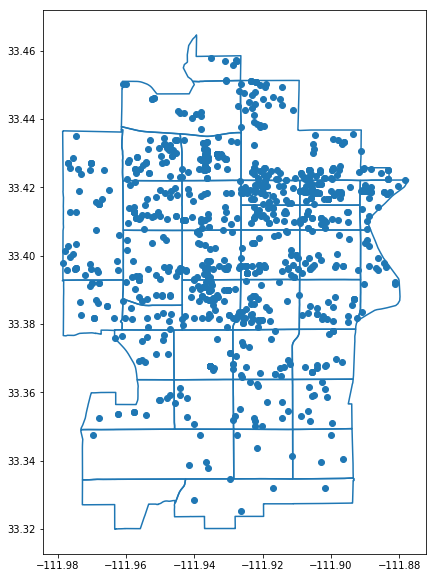

In [209]:
fig, ax = plt.subplots(figsize=(10,10))
tempe.boundary.plot(ax=ax)
ems_all.plot(ax=ax)

In [255]:
#All EMS Calls that are Opioid related and from the dates 01/2018-08/2019
#MAY NEED TO EDIT DUE TO DATES
ems_allc = ems_all[ems_all['Opioid_Use'] == 'Yes']
ems_allc = ems_allc[ems_allc['Year'] != 2017]
ems_allc.head()

,OBJECTID,Incident_Date,Weekday,Weekday_Sort,Month,Month_Sort,Year,Opioid_Use,Narcan_Given,Age,Patient_Gender,Patient_ASU,Patient_Veteran,Patient_Homeless,Latitude_Random,Longitude_Random,Spec_Pop,Notes,Time_of_Day,geometry
453,454,1516060800000,Tuesday,(3) Tuesday,January,(01) January,2018,Yes,Yes,20 to 24,Male,Unknown,Unknown,Unknown,33.4241,-111.9532,None,None,Evening,POINT (-111.95320 33.42410)
468,469,1517443200000,Thursday,(5) Thursday,February,(02) February,2018,Yes,NULL,25 to 29,Male,No,Yes,No,33.4230,-111.9436,Veteran,None,Overnight,POINT (-111.94360 33.42300)
479,480,1518739200000,Friday,(6) Friday,February,(02) February,2018,Yes,NULL,55 to 59,Female,No,Unknown,Unknown,33.4309,-111.9475,None,None,Evening,POINT (-111.94750 33.43090)
523,524,1521504000000,Tuesday,(3) Tuesday,March,(03) March,2018,Yes,NULL,25 to 29,Male,No,No,No,33.4288,-111.9567,None,None,Afternoon,POINT (-111.95670 33.42880)
571,572,1524700800000,Thursday,(5) Thursday,April,(04) April,2018,Yes,Yes,35 to 39,Male,No,No,No,33.4255,-111.9572,None,None,Morning,POINT (-111.95720 33.42550)


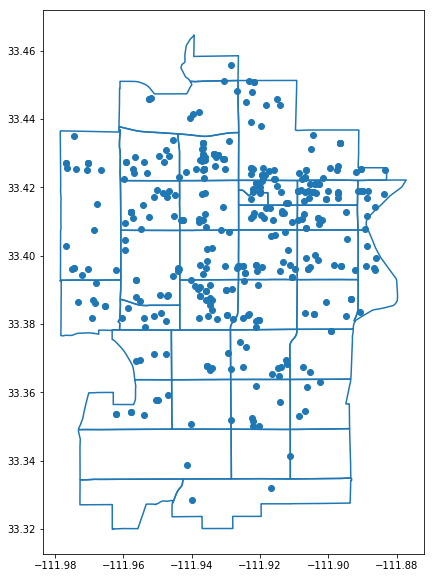

In [211]:
fig, ax = plt.subplots(figsize=(10,10))
tempe.boundary.plot(ax=ax)
ems_allc.plot(ax=ax)

In [256]:
#Making EMS_Tract Dataframe - has Tract Name, Tract Geometry, Age columns, Num EMS Opioid Calls in Tract
desired_tract_columns = ['TempeTracts_NAME',
                         'pdb2018trv4_us_csv_pct_Pop_un_1','pdb2018trv4_us_csv_pct_Pop_5_18','pdb2018trv4_us_csv_pct_Pop_18_3','pdb2018trv4_us_csv_pct_Pop_25_5',
              'pdb2018trv4_us_csv_pct_Pop_45_7','pdb2018trv4_us_csv_pct_Pop_65_1',
                         'pdb2018trv4_us_csv_pct_Civ_emp_',
                         'pdb2018trv4_us_csv_pct_Civ_em_1','pdb2018trv4_us_csv_pct_Civ_em_3','pdb2018trv4_us_csv_pct_Civ_em_5',
                         'pdb2018trv4_us_csv_pct_Civ_unem',
                         'pdb2018trv4_us_csv_pct_Civ_un_2','pdb2018trv4_us_csv_pct_Civ_un_4','pdb2018trv4_us_csv_pct_Civ_un_6',
                         'pdb2018trv4_us_csv_pct_Not_HS_G','pdb2018trv4_us_csv_pct_College_',
                         'pdb2018trv4_us_csv_pct_No_Healt','pdb2018trv4_us_csv_pct_One_Heal','pdb2018trv4_us_csv_pct_TwoPHeal',
                         'pdb2018trv4_us_csv_pct_Prs_Blw_',
                         'geometry']
ems_tract_df = tempe[desired_tract_columns]
ems_tract_df.columns = ['TempeTracts_NAME','PctPopUnder5','PctPop5_17','PctPop18_24','PctPop25_44','PctPop45_64','PctPop65_Up',
                        'PctEmpUnder16','PctEmp16_24','PctEmp25_44','PctEmp45_64',
                        'PctUnempUnder16','PctUnemp16_24','PctUnemp25_44','PctUnemp45_64',
                        'PctCollegeGrad','PctNotHSGrad',
                        'PctNoHealthIns','PctOneHealthIns','PctTwoHealthIns',
                        'PctBelowPoverty','geometry']
num_calls = []

for i in range(len(tempe)):
    df = ems_allc[ems_allc.within(tempe.loc[i,'geometry'])]
    nc = len(df)
    num_calls.append(nc)

ems_tract_df["Num_EMS_Calls"] = num_calls


/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [257]:
ems_tract_df.head()

,TempeTracts_NAME,PctPopUnder5,PctPop5_17,PctPop18_24,PctPop25_44,PctPop45_64,PctPop65_Up,PctEmpUnder16,PctEmp16_24,PctEmp25_44,...,PctUnemp25_44,PctUnemp45_64,PctCollegeGrad,PctNotHSGrad,PctNoHealthIns,PctOneHealthIns,PctTwoHealthIns,PctBelowPoverty,geometry,Num_EMS_Calls
0,3188,3.31,5.66,34.89,40.73,10.60,4.81,96.81,97.12,96.58,...,3.42,2.32,12.68,39.62,21.51,66.77,11.72,31.48,"POLYGON ((-111.96132 33.43719, -111.96132 33.4...",14
1,3191.01,2.96,7.20,62.63,21.26,5.95,0.00,87.71,91.14,83.30,...,16.70,16.95,16.26,36.48,23.23,70.40,6.37,73.11,"POLYGON ((-111.92629 33.41915, -111.92611 33.4...",2
2,3189,3.38,6.06,31.45,31.21,19.71,8.20,93.78,95.67,92.52,...,7.48,7.35,8.23,49.23,14.98,72.25,12.77,27.87,"POLYGON ((-111.96090 33.42195, -111.95857 33.4...",17
3,3190,0.82,2.07,81.56,10.22,3.72,1.60,88.55,85.07,100.00,...,0.00,0.00,0.00,63.30,10.87,77.17,11.96,34.24,"POLYGON ((-111.94358 33.41505, -111.94357 33.4...",12
4,3194.03,5.90,16.18,10.82,29.77,23.43,13.90,93.86,94.95,97.73,...,2.27,13.32,4.53,38.78,15.67,67.41,16.80,21.39,"POLYGON ((-111.90912 33.39411, -111.90912 33.3...",11


In [258]:
#Pickling ems_tract_df which contains the dataframe of all of Tempe with EMS Call data
with open('DataFiles/emsCountPerTractAllTempe.pkl', 'wb') as pkl_file:
    pkl.dump(ems_tract_df, pkl_file)

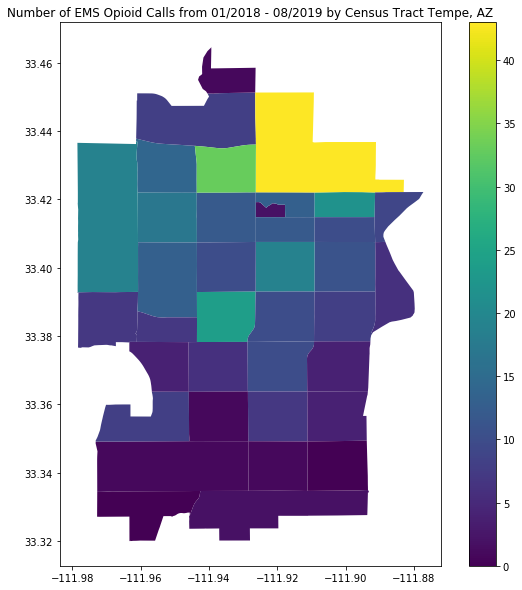

In [259]:
fig, ax = plt.subplots(figsize=(10,10))
ems_tract_df.plot(column='Num_EMS_Calls', ax=ax, legend=True)
plt.title("Number of EMS Opioid Calls from 01/2018 - 08/2019 by Census Tract Tempe, AZ")
plt.savefig('EMSCallsCensusTract.png')

In [219]:
ems_allc

,OBJECTID,Incident_Date,Weekday,Weekday_Sort,Month,Month_Sort,Year,Opioid_Use,Narcan_Given,Age,Patient_Gender,Patient_ASU,Patient_Veteran,Patient_Homeless,Latitude_Random,Longitude_Random,Spec_Pop,Notes,Time_of_Day,geometry
453,454,1516060800000,Tuesday,(3) Tuesday,January,(01) January,2018,Yes,Yes,20 to 24,Male,Unknown,Unknown,Unknown,33.4241,-111.9532,None,None,Evening,POINT (-111.95320 33.42410)
468,469,1517443200000,Thursday,(5) Thursday,February,(02) February,2018,Yes,NULL,25 to 29,Male,No,Yes,No,33.4230,-111.9436,Veteran,None,Overnight,POINT (-111.94360 33.42300)
479,480,1518739200000,Friday,(6) Friday,February,(02) February,2018,Yes,NULL,55 to 59,Female,No,Unknown,Unknown,33.4309,-111.9475,None,None,Evening,POINT (-111.94750 33.43090)
523,524,1521504000000,Tuesday,(3) Tuesday,March,(03) March,2018,Yes,NULL,25 to 29,Male,No,No,No,33.4288,-111.9567,None,None,Afternoon,POINT (-111.95670 33.42880)
571,572,1524700800000,Thursday,(5) Thursday,April,(04) April,2018,Yes,Yes,35 to 39,Male,No,No,No,33.4255,-111.9572,None,None,Morning,POINT (-111.95720 33.42550)
675,676,1533427200000,Sunday,(1) Sunday,August,(08) August,2018,Yes,Yes,45 to 49,Female,Unknown,Unknown,No,33.4275,-111.9482,None,None,Evening,POINT (-111.94820 33.42750)
700,701,1536364800000,Saturday,(7) Saturday,September,(09) September,2018,Yes,Yes,25 to 29,Male,No,No,No,33.4291,-111.9466,None,None,Morning,POINT (-111.94660 33.42910)
805,806,1547596800000,Wednesday,(4) Wednesday,January,(01) January,2019,Yes,Yes,20 to 24,Male,Unknown,Unknown,No,33.4273,-111.9593,None,None,Morning,POINT (-111.95930 33.42730)
836,837,1550275200000,Saturday,(7) Saturday,February,(02) February,2019,Yes,Yes,35 to 39,Male,No,No,No,33.4339,-111.9456,None,None,Afternoon,POINT (-111.94560 33.43390)
867,868,1553212800000,Friday,(6) Friday,March,(03) March,2019,Yes,Yes,20 to 24,Male,No,No,No,33.4273,-111.9593,None,None,Afternoon,POINT (-111.95930 33.42730)


In [260]:
ems_df_full = pd.DataFrame()
#ems_df_full.columns = odf.columns

odf = tempe_tract_df

for i in range(len(tempe)):
    df = ems_allc[ems_allc.within(odf.loc[i,'geometry'])]
    ems_monthly = df.filter(['Month_Sort', 'Opioid_Use']).groupby('Month_Sort').count()
    num = []
    for m in ems_monthly['Opioid_Use']:
        n = m
        num.append(m)
    months = list(np.unique(df['Month_Sort']))
    x = len(ems_monthly['Opioid_Use'])
    t = pd.DataFrame(odf.loc[i]).T
    e_m = pd.DataFrame(np.repeat(t.values,x,axis=0))
    e_m.columns = t.columns
    e_m['Month'] = months
    e_m['Opioid_Use_EMS'] = num
    ems_df_full = ems_df_full.append(e_m)

ems_df_full

,TempeTracts_NAME,PctPopUnder5,PctPop5_17,PctPop18_24,PctPop25_44,PctPop45_64,PctPop65_Up,PctEmpUnder16,PctEmp16_24,PctEmp25_44,...,PctUnemp45_64,PctCollegeGrad,PctNotHSGrad,PctNoHealthIns,PctOneHealthIns,PctTwoHealthIns,PctBelowPoverty,geometry,Month,Opioid_Use_EMS
0,3188,3.31,5.66,34.89,40.73,10.6,4.81,96.81,97.12,96.58,...,2.32,12.68,39.62,21.51,66.77,11.72,31.48,"POLYGON ((-111.961324999619 33.4371869993457, ...",(01) January,2.0
1,3188,3.31,5.66,34.89,40.73,10.6,4.81,96.81,97.12,96.58,...,2.32,12.68,39.62,21.51,66.77,11.72,31.48,"POLYGON ((-111.961324999619 33.4371869993457, ...",(02) February,3.0
2,3188,3.31,5.66,34.89,40.73,10.6,4.81,96.81,97.12,96.58,...,2.32,12.68,39.62,21.51,66.77,11.72,31.48,"POLYGON ((-111.961324999619 33.4371869993457, ...",(03) March,2.0
3,3188,3.31,5.66,34.89,40.73,10.6,4.81,96.81,97.12,96.58,...,2.32,12.68,39.62,21.51,66.77,11.72,31.48,"POLYGON ((-111.961324999619 33.4371869993457, ...",(04) April,2.0
4,3188,3.31,5.66,34.89,40.73,10.6,4.81,96.81,97.12,96.58,...,2.32,12.68,39.62,21.51,66.77,11.72,31.48,"POLYGON ((-111.961324999619 33.4371869993457, ...",(06) June,1.0
5,3188,3.31,5.66,34.89,40.73,10.6,4.81,96.81,97.12,96.58,...,2.32,12.68,39.62,21.51,66.77,11.72,31.48,"POLYGON ((-111.961324999619 33.4371869993457, ...",(07) July,1.0
6,3188,3.31,5.66,34.89,40.73,10.6,4.81,96.81,97.12,96.58,...,2.32,12.68,39.62,21.51,66.77,11.72,31.48,"POLYGON ((-111.961324999619 33.4371869993457, ...",(08) August,2.0
7,3188,3.31,5.66,34.89,40.73,10.6,4.81,96.81,97.12,96.58,...,2.32,12.68,39.62,21.51,66.77,11.72,31.48,"POLYGON ((-111.961324999619 33.4371869993457, ...",(09) September,1.0
0,3191.01,2.96,7.2,62.63,21.26,5.95,0,87.71,91.14,83.3,...,16.95,16.26,36.48,23.23,70.4,6.37,73.11,"POLYGON ((-111.926293000195 33.4191529990701, ...",(02) February,1.0
1,3191.01,2.96,7.2,62.63,21.26,5.95,0,87.71,91.14,83.3,...,16.95,16.26,36.48,23.23,70.4,6.37,73.11,"POLYGON ((-111.926293000195 33.4191529990701, ...",(06) June,1.0


### EMS in Collection Areas

In [223]:
#Census Tracts in Collection Area

tracts = np.unique(tempe_tract_df['TempeTracts_NAME'])
print(tracts)

['3184' '3185.01' '3187' '3188' '3189' '3190' '3191.01' '3191.03'
 '3191.04' '3192.01' '3192.02' '3193' '3194.01' '3194.02' '3194.03'
 '3194.04' '3195' '3196' '3197.03' '3197.04' '3197.05' '3197.06' '3198'
 '3199.02' '3199.03' '3199.04' '3199.05' '3199.06' '3199.07' '3199.08'
 '3199.09' '3199.10' '3200.01' '3200.07' '3201' '8100' '8101']


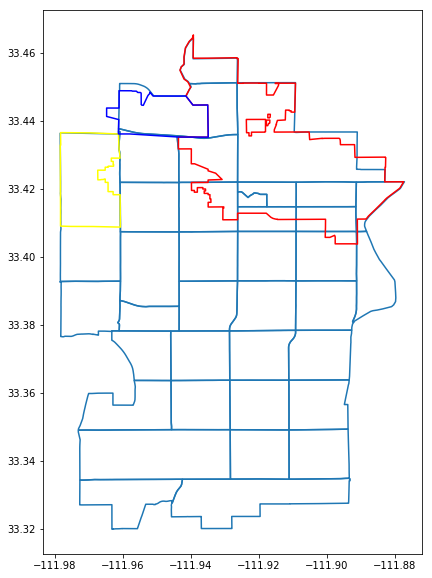

In [224]:
fig, ax = plt.subplots(figsize=(10,10))
tempe_tract_df.boundary.plot(ax=ax)
sa[sa['Site'] == 'TP02'].boundary.plot(ax=ax, color='red')
sa[sa['Site'] == 'TP04'].boundary.plot(ax=ax, color = 'yellow')
sa[sa['Site'] == 'TP05'].boundary.plot(ax=ax, color = 'blue')

#According to: https://factfinder.census.gov/faces/nav/jsf/pages/searchresults.xhtml?refresh=t
tracts_TP02 = [3185.01,3201,3187,3148,3190,3191.04,3191.03,3191.01,3192.02,3193,3192.01]
tracts_TP04 = [3197.04]
tracts_TP05 = [3201]

In [225]:
ems_df_full['TempeTracts_NAME'] = ems_df_full['TempeTracts_NAME'].astype(str)
ems_df_full['TempeTracts_NAME'].dtype

dtype('O')

In [261]:
emsTP02 = pd.DataFrame()

for i in tracts_TP02:
    i = str(i)
    edf = ems_df_full[ems_df_full['TempeTracts_NAME'].astype(str) == i]
    emsTP02 = emsTP02.append(edf)

emsTP04 = pd.DataFrame()

for i in tracts_TP04:
    i = str(i)
    edf = ems_df_full[ems_df_full['TempeTracts_NAME'].astype(str) == i]
    emsTP04 = emsTP04.append(edf)
    
emsTP05 = pd.DataFrame()
for i in tracts_TP05:
    i = str(i)
    edf = ems_df_full[ems_df_full['TempeTracts_NAME'].astype(str) == i]
    emsTP05 = emsTP05.append(edf)

In [262]:
emsWastewaterSites = pd.DataFrame()

emsWastewaterSites = emsWastewaterSites.append(emsTP02, ignore_index=True)
emsWastewaterSites = emsWastewaterSites.append(emsTP04, ignore_index=True)
emsWastewaterSites = emsWastewaterSites.append(emsTP05, ignore_index=True)

In [263]:
emsTP02.to_csv(r'DataFiles/emsCallsTP02Census.csv')
emsTP04.to_csv(r'DataFiles/emsCallsTP04Census.csv')
emsTP05.to_csv(r'DataFiles/emsCallsTP05Census.csv')
emsWastewaterSites.to_csv(r'DataFiles/emsWastewaterSites.csv')

In [241]:
emsWastewaterSites.head()

,TempeTracts_NAME,PctPopUnder5,PctPop5_17,PctPop18_24,PctPop25_44,PctPop45_64,PctPop65_Up,PctEmpUnder16,PctEmp16_24,PctEmp25_44,...,PctUnemp45_64,PctCollegeGrad,PctNotHSGrad,PctNoHealthIns,PctOneHealthIns,PctTwoHealthIns,PctBelowPoverty,geometry,Month,Opioid_Use_EMS
0,3185.01,5.92,12.74,9.19,38.77,21.9,11.48,94.58,96.68,93.61,...,4.66,13.22,29.73,15.72,67.49,16.79,15.53,"POLYGON ((-111.943128000406 33.4551579994163, ...",(02) February,1.0
1,3201,1.9,3.49,26.21,48.71,15.48,4.21,96.85,95.63,97.1,...,2.49,4.33,51.36,11.99,77.69,10.32,20.47,"POLYGON ((-111.961306000346 33.4379019994117, ...",(01) January,1.0
2,3201,1.9,3.49,26.21,48.71,15.48,4.21,96.85,95.63,97.1,...,2.49,4.33,51.36,11.99,77.69,10.32,20.47,"POLYGON ((-111.961306000346 33.4379019994117, ...",(02) February,1.0
3,3201,1.9,3.49,26.21,48.71,15.48,4.21,96.85,95.63,97.1,...,2.49,4.33,51.36,11.99,77.69,10.32,20.47,"POLYGON ((-111.961306000346 33.4379019994117, ...",(03) March,1.0
4,3201,1.9,3.49,26.21,48.71,15.48,4.21,96.85,95.63,97.1,...,2.49,4.33,51.36,11.99,77.69,10.32,20.47,"POLYGON ((-111.961306000346 33.4379019994117, ...",(04) April,2.0


## Regression

In [242]:
#Wastewater Sites
mod1 = smf.ols(formula='Opioid_Use_EMS ~ PctPopUnder5 + PctPop5_17 + PctPop18_24 + PctPop25_44 + PctPop45_64 + PctPop65_Up + PctEmpUnder16 + PctEmp16_24 + PctEmp25_44 + PctEmp45_64 + PctUnempUnder16 + PctUnemp16_24 + PctUnemp25_44 + PctUnemp45_64 + PctCollegeGrad + PctNotHSGrad + PctNoHealthIns + PctOneHealthIns + PctTwoHealthIns + PctBelowPoverty', data=emsWastewaterSites)



In [243]:
res1 = mod1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Opioid_Use_EMS   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     2.548
Date:                Tue, 05 Nov 2019   Prob (F-statistic):             0.0111
Time:                        09:52:57   Log-Likelihood:                -124.79
No. Observations:                  81   AIC:                             271.6
Df Residuals:                      70   BIC:                             297.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.6571      0.071      9.294      0.000       0.516       0.798
PctPopUnder5[T.0.82]         0.1049      0.033      3.156      0.002       0.039       0.171
PctPopUnder5[T.1.3]          0.0644      0.027      2.416      0.018       0.011       0.118
PctPopUnder5[T.1.9]          0.0256      0.017      1.510      0.136      -0.008       0.059
PctPopUnder5[T.2.96]         0.0214      0.052      0.414      0.680      -0.082       0.125
PctPopUnder5[T.3.21]         0.0338      0.020      1.697      0.094      -0.006       0.074
PctPopUnder5[T.3.47]         0.0349      0.025      1.401      0.166      -0.015       0.085
PctPopUnder5[T.4.29]         0.0386      0.023      1.714      0.091      -0.006       0.083
PctPopUnder5[T.5.92]         0.0202      0.069      0.293      0.771      -0.117       0.158
PctPopUnder5[T.6.3]          0.0621      0.019      3.282      0.002       0.024       0.100
PctPopUnder5[T.6.76]         0.1046      0.021      4.961      0.000       0.063       0.147
PctPop5_17[T.2.07]           0.1049      0.033      3.156      0.002       0.039       0.171
PctPop5_17[T.2.42]           0.0644      0.027      2.416      0.018       0.011       0.118
PctPop5_17[T.3.49]           0.0256      0.017      1.510      0.136      -0.008       0.059
PctPop5_17[T.5.92]           0.0338      0.020      1.697      0.094      -0.006       0.074
PctPop5_17[T.7.2]            0.0214      0.052      0.414      0.680      -0.082       0.125
PctPop5_17[T.9.2]            0.0386      0.023      1.714      0.091      -0.006       0.083
PctPop5_17[T.12.05]          0.0349      0.025      1.401      0.166      -0.015       0.085
PctPop5_17[T.12.34]          0.0621      0.019      3.282      0.002       0.024       0.100
PctPop5_17[T.12.74]          0.0202      0.069      0.293      0.771      -0.117       0.158
PctPop5_17[T.13.6]           0.1046      0.021      4.961      0.000       0.063       0.147
PctPop18_24[T.18.7]          0.0621      0.019      3.282      0.002       0.024       0.100
PctPop18_24[T.25.94]         0.0349      0.025      1.401      0.166      -0.015       0.085
PctPop18_24[T.26.21]         0.0256      0.017      1.510      0.136      -0.008       0.059
PctPop18_24[T.28.71]         0.0386      0.023      1.714      0.091      -0.006       0.083
PctPop18_24[T.31.09]         0.1046      0.021      4.961      0.000       0.063       0.147
PctPop18_24[T.40.71]         0.0338      0.020      1.697      0.094      -0.006       0.074
PctPop18_24[T.62.63]         0.0214      0.052      0.414      0.680      -0.082       0.125
PctPop18_24[T.65.12]         0.0644      0.027      2.416      0.018       0.011       0.118
PctPop18_24[T.81.56]         0.1049      0.033      3.156      0.002       0.039       0.171
PctPop18_24[T.

### EMS Calls Outside of Collection Sites

In [264]:
tracts_IN = [3185.01,3201,3187,3148,3190,3191.04,3191.03,3191.01,3192.02,3193,3192.01,3197.04,3201]

tracts_OUT = [x for x in tracts if x not in tracts_IN]


In [265]:
emsNonCollection = pd.DataFrame()

for i in tracts_OUT:
    i = str(i)
    edf = ems_df_full[ems_df_full['TempeTracts_NAME'].astype(str) == i]
    emsNonCollection = emsNonCollection.append(edf)


In [266]:
emsNonCollection.to_csv(r'DataFiles/emsCallsNotCollectionSiteCensus.csv')

In [247]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

emsNonCollection.columns

Index(['TempeTracts_NAME', 'PctPopUnder5', 'PctPop5_17', 'PctPop18_24',
       'PctPop25_44', 'PctPop45_64', 'PctPop65_Up', 'PctEmpUnder16',
       'PctEmp16_24', 'PctEmp25_44', 'PctEmp45_64', 'PctUnempUnder16',
       'PctUnemp16_24', 'PctUnemp25_44', 'PctUnemp45_64', 'PctCollegeGrad',
       'PctNotHSGrad', 'PctNoHealthIns', 'PctOneHealthIns', 'PctTwoHealthIns',
       'PctBelowPoverty', 'geometry', 'Month', 'Opioid_Use_EMS'],
      dtype='object')

In [248]:
mod = smf.ols(formula='Opioid_Use_EMS ~ PctPopUnder5 + PctPop5_17 + PctPop18_24 + PctPop25_44 + PctPop45_64 + PctPop65_Up + PctEmpUnder16 + PctEmp16_24 + PctEmp25_44 + PctEmp45_64 + PctUnempUnder16 + PctUnemp16_24 + PctUnemp25_44 + PctUnemp45_64 + PctCollegeGrad + PctNotHSGrad + PctNoHealthIns + PctOneHealthIns + PctTwoHealthIns + PctBelowPoverty', data=emsNonCollection)


In [249]:
res = mod.fit()

In [250]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Opioid_Use_EMS   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     2.463
Date:                Tue, 05 Nov 2019   Prob (F-statistic):           8.35e-05
Time:                        09:54:38   Log-Likelihood:                -291.31
No. Observations:                 203   AIC:                             652.6
Df Residuals:                     168   BIC:                             768.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.0568      0.066     15.929      0.000       0.926       1.188
PctPopUnder5[T.0.82]         0.0645      0.030      2.169      0.032       0.006       0.123
PctPopUnder5[T.1.3]          0.0291      0.025      1.143      0.254      -0.021       0.079
PctPopUnder5[T.1.9]          0.0043      0.021      0.205      0.838      -0.037       0.046
PctPopUnder5[T.2.53]         0.0906      0.042      2.175      0.031       0.008       0.173
PctPopUnder5[T.2.69]         0.0638      0.032      2.006      0.047       0.001       0.127
PctPopUnder5[T.2.87]         0.0178      0.021      0.842      0.401      -0.024       0.059
PctPopUnder5[T.2.96]        -0.0035      0.048     -0.073      0.942      -0.099       0.092
PctPopUnder5[T.2.99]         0.0088      0.020      0.439      0.661      -0.031       0.048
PctPopUnder5[T.3.21]         0.0138      0.019      0.745      0.458      -0.023       0.050
PctPopUnder5[T.3.27]        -0.0028      0.055     -0.052      0.959      -0.111       0.106
PctPopUnder5[T.3.31]         0.0347      0.020      1.763      0.080      -0.004       0.073
PctPopUnder5[T.3.36]        -0.0033      0.064     -0.052      0.959      -0.130       0.124
PctPopUnder5[T.3.38]         0.0416      0.019      2.240      0.026       0.005       0.078
PctPopUnder5[T.3.47]         0.0083      0.023      0.354      0.724      -0.038       0.054
PctPopUnder5[T.3.51]        -0.0030      0.021     -0.145      0.885      -0.044       0.038
PctPopUnder5[T.3.67]        -0.0030      0.041     -0.073      0.942      -0.084       0.078
PctPopUnder5[T.4.29]         0.0186      0.021      0.886      0.377      -0.023       0.060
PctPopUnder5[T.4.31]         0.0088      0.020      0.439      0.661      -0.031       0.048
PctPopUnder5[T.4.81]         0.0527      0.019      2.838      0.005       0.016       0.089
PctPopUnder5[T.5.11]         0.1298      0.019      6.928      0.000       0.093       0.167
PctPopUnder5[T.5.18]         0.0222      0.028      0.803      0.423      -0.032       0.077
PctPopUnder5[T.5.4]         -0.0020      0.034     -0.058      0.954      -0.069       0.065
PctPopUnder5[T.5.43]         0.0543      0.023      2.388      0.018       0.009       0.099
PctPopUnder5[T.5.5]          0.0077      0.034      0.230      0.819      -0.059       0.074
PctPopUnder5[T.5.59]        -0.0028      0.028     -0.103      0.918      -0.057       0.052
PctPopUnder5[T.5.89]         0.0230      0.025      0.919      0.359      -0.026       0.072
PctPopUnder5[T.5.9]          0.0388      0.023      1.716      0.088      -0.006       0.083
PctPopUnder5[T.5.92]        -0.0028      0.055     -0.052      0.959      -0.111       0.106
PctPopUnder5[T.6.07]         0.0163      0.025      0.655      0.514      -0.033       0.065
PctPopUnder5[T

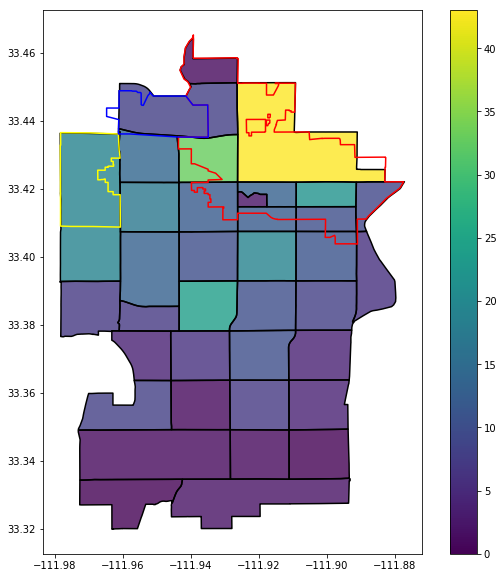

In [251]:
fig, ax = plt.subplots(figsize=(10,10))
tempe.boundary.plot(ax=ax, color='black')
sa[sa['Site'] == 'TP02'].boundary.plot(ax=ax, color='red')
sa[sa['Site'] == 'TP04'].boundary.plot(ax=ax, color = 'yellow')
sa[sa['Site'] == 'TP05'].boundary.plot(ax=ax, color = 'blue')
ems_tract_df.plot(column='Num_EMS_Calls', ax=ax, legend=True, alpha=0.8)


# Continuing Work
I'm still working below. This stuff was not used in Thursday (10/31) presentation

In [70]:
two = pd.read_csv('tp02waterdata.csv')
four = pd.read_csv('tp04waterdata.csv')
five = pd.read_csv('tp05waterdata.csv')

In [71]:
two.drop(['OBJECTID'], axis=1, inplace=True)
four.drop(['OBJECTID'], axis=1, inplace=True)
five.drop(['OBJECTID'], axis=1, inplace=True)

In [123]:
two.drop(['Unnamed: 0'], axis=1, inplace=True)
four.drop(['Unnamed: 0'], axis=1, inplace=True)
five.drop(['Unnamed: 0'], axis=1, inplace=True)

#sa

In [124]:
#cleaning and merging with geometry
two = two.merge(sa, on='Site')
four = four.merge(sa, on='Site')
five = five.merge(sa, on='Site')

#clean NaNs
two.Population_Normalized_Mass_Load.replace(-9999.99, np.NaN, inplace = True)
two.Population_Normalized_Mass_Load.replace(9999.99, np.NaN, inplace = True)
two['Month_Year'] = pd.to_datetime(two['Sample_Date']).dt.to_period('M')

four.Population_Normalized_Mass_Load.replace(-9999.99, np.NaN, inplace = True)
four.Population_Normalized_Mass_Load.replace(9999.99, np.NaN, inplace = True)
four['Month_Year'] = pd.to_datetime(four['Sample_Date']).dt.to_period('M')

five.Population_Normalized_Mass_Load.replace(-9999.99, np.NaN, inplace = True)
five.Population_Normalized_Mass_Load.replace(9999.99, np.NaN, inplace = True)
five['Month_Year'] = pd.to_datetime(five['Sample_Date']).dt.to_period('M')

#set date-time index 
two.Sample_Date = pd.to_datetime(two.Sample_Date)

two.set_index('Sample_Date', inplace=True)
four.Sample_Date = pd.to_datetime(four.Sample_Date)
four.set_index('Sample_Date', inplace=True)
five.Sample_Date = pd.to_datetime(five.Sample_Date)
five.set_index('Sample_Date', inplace=True)


#make geodataframes
two = gpd.GeoDataFrame(two)
four = gpd.GeoDataFrame(four)
five = gpd.GeoDataFrame(five)



In [34]:
two

,Chemical,Concentration_ng_L_Error,Concentration_ng_L_Value,Day,Mass_Load_g_d_Error,Mass_Load_g_d_Value,Month,Population_Normalized_Mass_Lo_1,Population_Normalized_Mass_Load,Site,Shape__Area,Shape__Length,geometry,Month_Year
Sample_Date,,,,,,,,,,,,,,
2018-05-14 03:00:00,Oxycodone,4.26,101.37,(1) Mon,0.06,1.51,(05) May,0,24.77,TP02,1.995787e+08,111025.980804,"POLYGON ((-111.93938 33.45847, -111.93502 33.4...",2018-05
2018-05-15 03:00:00,Oxycodone,2.33,106.94,(2) Tue,0.04,1.68,(05) May,0,27.54,TP02,1.995787e+08,111025.980804,"POLYGON ((-111.93938 33.45847, -111.93502 33.4...",2018-05
2018-05-16 03:00:00,Oxycodone,1.81,102.03,(3) Wed,0.03,1.60,(05) May,0,26.22,TP02,1.995787e+08,111025.980804,"POLYGON ((-111.93938 33.45847, -111.93502 33.4...",2018-05
2018-05-17 03:00:00,Oxycodone,5.34,115.53,(4) Thu,0.08,1.78,(05) May,0,29.27,TP02,1.995787e+08,111025.980804,"POLYGON ((-111.93938 33.45847, -111.93502 33.4...",2018-05
2018-05-18 03:00:00,Oxycodone,4.22,103.88,(5) Fri,0.06,1.54,(05) May,0,25.28,TP02,1.995787e+08,111025.980804,"POLYGON ((-111.93938 33.45847, -111.93502 33.4...",2018-05
2018-05-19 03:00:00,Oxycodone,1.83,95.74,(6) Sat,0.03,1.41,(05) May,0,23.13,TP02,1.995787e+08,111025.980804,"POLYGON ((-111.93938 33.45847, -111.93502 33.4...",2018-05
2018-05-20 03:00:00,Oxycodone,11.37,96.82,(7) Sun,0.17,1.43,(05) May,0,23.52,TP02,1.995787e+08,111025.980804,"POLYGON ((-111.93938 33.45847, -111.93502 33.4...",2018-05
2018-05-14 03:00:00,Noroxycodone,0.82,123.22,(1) Mon,0.01,1.83,(05) May,0,30.11,TP02,1.995787e+08,111025.980804,"POLYGON ((-111.93938 33.45847, -111.93502 33.4...",2018-05
2018-05-15 03:00:00,Noroxycodone,2.63,108.03,(2) Tue,0.04,1.69,(05) May,0,27.82,TP02,1.995787e+08,111025.980804,"POLYGON ((-111.93938 33.45847, -111.93502 33.4...",2018-05


In [35]:

two.replace('(02) Feb', '(02) February', inplace=True)
two.replace('(03) Mar', '(03) March', inplace=True)
two.replace('(04) Apr', '(04) April', inplace=True)
two.replace('(06) Jun', '(06) June', inplace=True)
two.replace('(07) Jul', '(07) July', inplace=True)
two.replace('(08) Aug', '(08) August', inplace =True)

In [115]:
pd.DataFrame(tempe.loc[1]).T

,OBJECTID,TempeTracts_STATEFP,TempeTracts_COUNTYFP,TempeTracts_TRACTCE,TempeTracts_GEOID,TempeTracts_NAME,TempeTracts_NAMELSAD,TempeTracts_MTFCC,TempeTracts_FUNCSTAT,TempeTracts_ALAND,...,pdb2018trv4_us_csv_pct_Vacants_,pdb2018trv4_us_csv_pct_Deletes_,pdb2018trv4_us_csv_pct_Census_U,pdb2018trv4_us_csv_pct_Mailback,pdb2018trv4_us_csv_pct_FRST_FRM,pdb2018trv4_us_csv_pct_RPLCMNT_,pdb2018trv4_us_csv_pct_BILQ_Mai,Shape__Area,Shape__Length,geometry
1,2,04,013,319101,04013319101,3191.01,Census Tract 3191.01,G5020,S,330646,...,1.94,0,24.12,73.94,32.04,8.81,NaN,3.55833e+06,8618.28,"POLYGON ((-111.926293000195 33.4191529990701, ..."


In [30]:
two['Sample_Date']

KeyError: 'Sample_Date'

In [5]:
tempe = gpd.read_file("https://services.arcgis.com/lQySeXwbBg53XWDi/arcgis/rest/services/Map/FeatureServer/0/query?where=OBJECTID+%3E+0+&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&returnCentroid=false&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=4326&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pgeojson&token=")

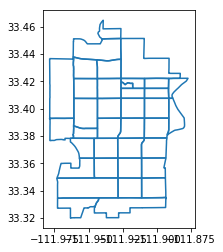

In [17]:
tempe.boundary.plot(label=tempe[''])

In [8]:
age_columns = ['pdb2018trv4_us_csv_Pop_5_17_ACS','pdb2018trv4_us_csv_Pop_18_24_AC','pdb2018trv4_us_csv_Pop_25_44_AC',
              'pdb2018trv4_us_csv_Pop_45_64_AC','pdb2018trv4_us_csv_Pop_65plus_A']

Index(['OBJECTID', 'TempeTracts_STATEFP', 'TempeTracts_COUNTYFP',
       'TempeTracts_TRACTCE', 'TempeTracts_GEOID', 'TempeTracts_NAME',
       'TempeTracts_NAMELSAD', 'TempeTracts_MTFCC', 'TempeTracts_FUNCSTAT',
       'TempeTracts_ALAND', 'TempeTracts_AWATER', 'TempeTracts_INTPTLAT',
       'TempeTracts_INTPTLON', 'TempeTracts_TractNo', 'TempeTracts_GeoTrack',
       'pdb2018trv4_us_csv_GIDTR', 'pdb2018trv4_us_csv_State',
       'pdb2018trv4_us_csv_State_name', 'pdb2018trv4_us_csv_County',
       'pdb2018trv4_us_csv_County_name', 'pdb2018trv4_us_csv_TRACTCE',
       'pdb2018trv4_us_csv_Flag', 'pdb2018trv4_us_csv_Num_BGs_in_T',
       'pdb2018trv4_us_csv_LAND_AREA', 'pdb2018trv4_us_csv_AIAN_LAND',
       'pdb2018trv4_us_csv_URBANIZED_AR', 'pdb2018trv4_us_csv_URBAN_CLUSTE',
       'pdb2018trv4_us_csv_RURAL_POP_CE', 'pdb2018trv4_us_csv_Tot_Populati',
       'pdb2018trv4_us_csv_Tot_Popula_1', 'pdb2018trv4_us_csv_Tot_Popula_2',
       'pdb2018trv4_us_csv_Males_CEN_20', 'pdb2018trv4_us_csv

In [11]:
tempe.columns[70:150]

Index(['pdb2018trv4_us_csv_NH_Asian_alo', 'pdb2018trv4_us_csv_NH_Asian_a_1',
       'pdb2018trv4_us_csv_NH_Asian_a_2', 'pdb2018trv4_us_csv_NH_NHOPI_alo',
       'pdb2018trv4_us_csv_NH_NHOPI_a_1', 'pdb2018trv4_us_csv_NH_NHOPI_a_2',
       'pdb2018trv4_us_csv_NH_SOR_alone', 'pdb2018trv4_us_csv_NH_SOR_alo_1',
       'pdb2018trv4_us_csv_NH_SOR_alo_2', 'pdb2018trv4_us_csv_Pop_5yrs_Ove',
       'pdb2018trv4_us_csv_Pop_5yrs_O_1', 'pdb2018trv4_us_csv_Othr_Lang_AC',
       'pdb2018trv4_us_csv_Othr_Lang__1', 'pdb2018trv4_us_csv_Age5p_Only_E',
       'pdb2018trv4_us_csv_Age5p_Only_1', 'pdb2018trv4_us_csv_Age5p_Spanis',
       'pdb2018trv4_us_csv_Age5p_Span_1', 'pdb2018trv4_us_csv_Age5p_French',
       'pdb2018trv4_us_csv_Age5p_Fren_1', 'pdb2018trv4_us_csv_Age5p_German',
       'pdb2018trv4_us_csv_Age5p_Germ_1', 'pdb2018trv4_us_csv_Age5p_Russia',
       'pdb2018trv4_us_csv_Age5p_Russ_1', 'pdb2018trv4_us_csv_Age5p_OthEur',
       'pdb2018trv4_us_csv_Age5p_OthE_1', 'pdb2018trv4_us_csv_Age5p_Korean',

In [20]:
tempe.head()

,OBJECTID,TempeTracts_STATEFP,TempeTracts_COUNTYFP,TempeTracts_TRACTCE,TempeTracts_GEOID,TempeTracts_NAME,TempeTracts_NAMELSAD,TempeTracts_MTFCC,TempeTracts_FUNCSTAT,TempeTracts_ALAND,...,pdb2018trv4_us_csv_pct_Vacants_,pdb2018trv4_us_csv_pct_Deletes_,pdb2018trv4_us_csv_pct_Census_U,pdb2018trv4_us_csv_pct_Mailback,pdb2018trv4_us_csv_pct_FRST_FRM,pdb2018trv4_us_csv_pct_RPLCMNT_,pdb2018trv4_us_csv_pct_BILQ_Mai,Shape__Area,Shape__Length,geometry
0,1,04,013,318800,04013318800,3188,Census Tract 3188,G5020,S,2569382,...,2.84,0,21.21,75.95,40.84,8.94,NaN,2.770706e+07,21462.867389,"POLYGON ((-111.96132 33.43719, -111.96132 33.4..."
1,2,04,013,319101,04013319101,3191.01,Census Tract 3191.01,G5020,S,330646,...,1.94,0,24.12,73.94,32.04,8.81,NaN,3.558325e+06,8618.283373,"POLYGON ((-111.92629 33.41915, -111.92611 33.4..."
2,3,04,013,318900,04013318900,3189,Census Tract 3189,G5020,S,2589083,...,3.04,0,9.56,87.41,58.33,6.86,NaN,2.786309e+07,21120.878745,"POLYGON ((-111.96090 33.42195, -111.95857 33.4..."
3,4,04,013,319000,04013319000,3190,Census Tract 3190,G5020,S,2588739,...,14.36,0,9.11,76.53,49.79,5.07,NaN,2.785941e+07,21103.097728,"POLYGON ((-111.94358 33.41505, -111.94357 33.4..."
4,5,04,013,319403,04013319403,3194.03,Census Tract 3194.03,G5020,S,2657428,...,5.68,0,4.26,90.06,66.37,0.00,NaN,2.869570e+07,21428.155647,"POLYGON ((-111.90912 33.39411, -111.90912 33.3..."


In [48]:
ems[ems.within(tempe.loc[0,'geometry'])]

,OBJECTID,Incident_Date,Weekday,Weekday_Sort,Month,Month_Sort,Year,Opioid_Use,Narcan_Given,Age,Patient_Gender,Patient_ASU,Patient_Veteran,Patient_Homeless,Latitude_Random,Longitude_Random,Spec_Pop,Notes,Time_of_Day,geometry
28,29,1485734400000,Monday,(2) Monday,January,(01) January,2017,Yes,Yes,25 to 29,Male,No,Yes,No,33.4279,-111.9591,Veteran,None,Evening,POINT (-111.95910 33.42790)
97,98,1491177600000,Monday,(2) Monday,April,(04) April,2017,Yes,NULL,15 to 19,Male,No,Yes,Yes,33.4338,-111.9449,Veteran/Homeless,None,Overnight,POINT (-111.94490 33.43380)
110,111,1491868800000,Tuesday,(3) Tuesday,April,(04) April,2017,Yes,NULL,20 to 24,Male,Unknown,Unknown,No,33.4271,-111.9495,None,None,Morning,POINT (-111.94950 33.42710)
166,167,1495238400000,Saturday,(7) Saturday,May,(05) May,2017,Yes,Yes,25 to 29,Male,Unknown,Unknown,No,33.4288,-111.9567,None,None,Morning,POINT (-111.95670 33.42880)
176,177,1496102400000,Tuesday,(3) Tuesday,May,(05) May,2017,Unknown,Yes,20 to 24,Male,No,No,No,33.4313,-111.9535,None,None,Afternoon,POINT (-111.95350 33.43130)
191,192,1496707200000,Tuesday,(3) Tuesday,June,(06) June,2017,Yes,NULL,55 to 59,Male,No,Unknown,No,33.4316,-111.9480,None,None,Morning,POINT (-111.94800 33.43160)
215,216,1498521600000,Tuesday,(3) Tuesday,June,(06) June,2017,Yes,NULL,25 to 29,Male,No,No,No,33.4314,-111.9504,None,None,Afternoon,POINT (-111.95040 33.43140)
253,254,1500768000000,Sunday,(1) Sunday,July,(07) July,2017,Yes,NULL,30 to 34,Male,No,No,No,33.4230,-111.9442,None,None,Overnight,POINT (-111.94420 33.42300)
266,267,1501200000000,Friday,(6) Friday,July,(07) July,2017,No,Yes,65 to 69,Male,Unknown,Unknown,No,33.4339,-111.9530,None,None,Morning,POINT (-111.95300 33.43390)
270,271,1501286400000,Saturday,(7) Saturday,July,(07) July,2017,Unknown,Yes,70 to 74,Female,No,No,No,33.4264,-111.9549,None,None,Evening,POINT (-111.95490 33.42640)
